<a href="https://colab.research.google.com/github/dmc-mcc/DSI/blob/main/PROJECT_Stock_Market_Analytics_Scope_Group2_Phase_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase-5: Twitter (X) data
1. Import text file Tweets 12-6-24.txt
2. Perform text pre-processing
3. Obtain Word-Cloud
4. Perform Sentiment Analysis
5. Visualize sentiment scores

In [ ]:
# Import necessary libraries
import re
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import pandas as pd
from google.colab import files
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
uploaded=files.upload()

## 1. Import text file Tweets 12-6-24.txt

In [ ]:
# Step 1: Import the text file
with open("Tweets_12-6-24.txt", 'r') as file:
    data = file.readlines()

## 2. Perform text pre-processing

In [ ]:
# Step 2: Perform text pre-processing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

cleaned_data = [remove_stopwords(preprocess_text(line)) for line in data]

## 3. Obtain Word-Cloud

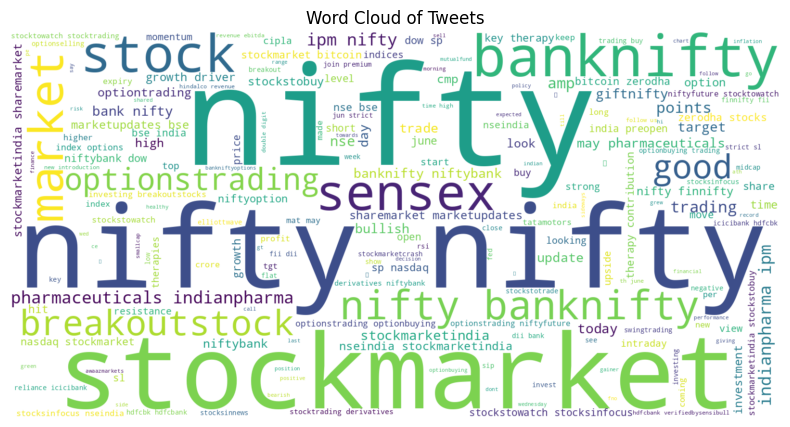

In [ ]:
# Step 3: Obtain a Word-Cloud
all_words = ' '.join(cleaned_data)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

## 4. Perform Sentiment Analysis

In [ ]:
# Step 4: Perform Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

sentiments = [get_sentiment(line) for line in cleaned_data]

## 5. Visualize sentiment scores

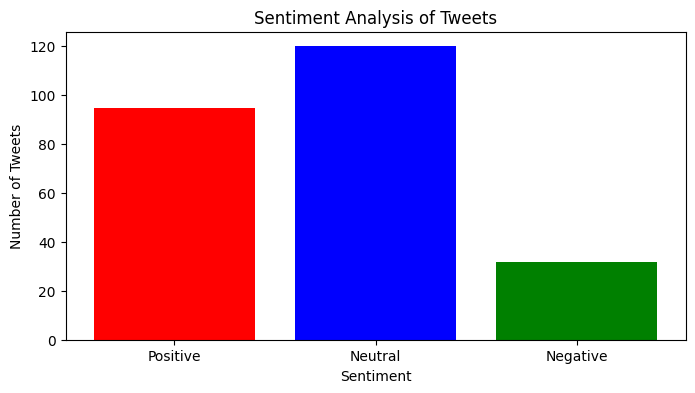

In [ ]:
# Step 5: Visualize sentiment scores
sentiment_counts = Counter(sentiments)

# Create a DataFrame for visualization
sentiment_df = pd.DataFrame.from_dict(sentiment_counts, orient='index').reset_index()
sentiment_df.columns = ['Sentiment', 'Count']

# Plot bar graph showing sentiment distribution
plt.figure(figsize=(8, 4))
plt.bar(sentiment_df['Sentiment'], sentiment_df['Count'], color=['red', 'blue', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.show()
